                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

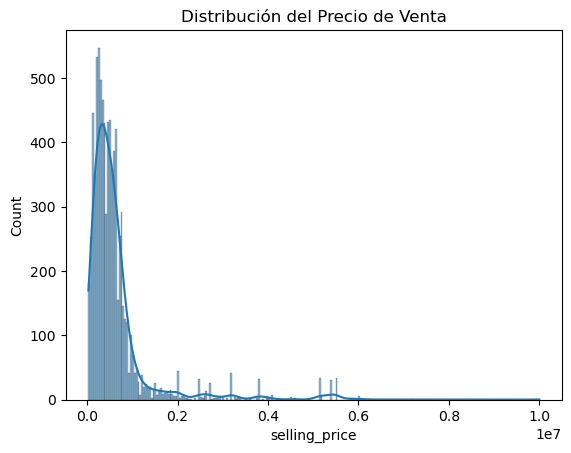

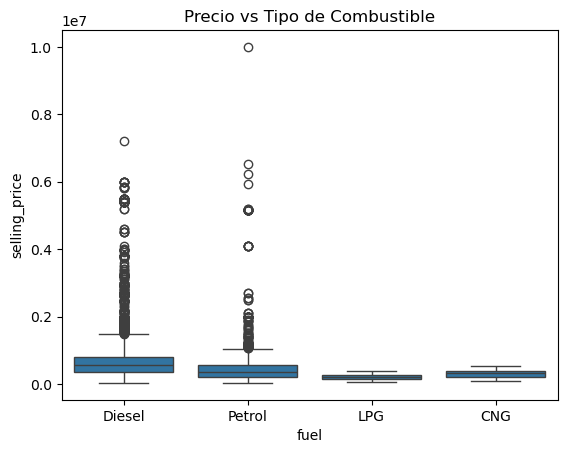

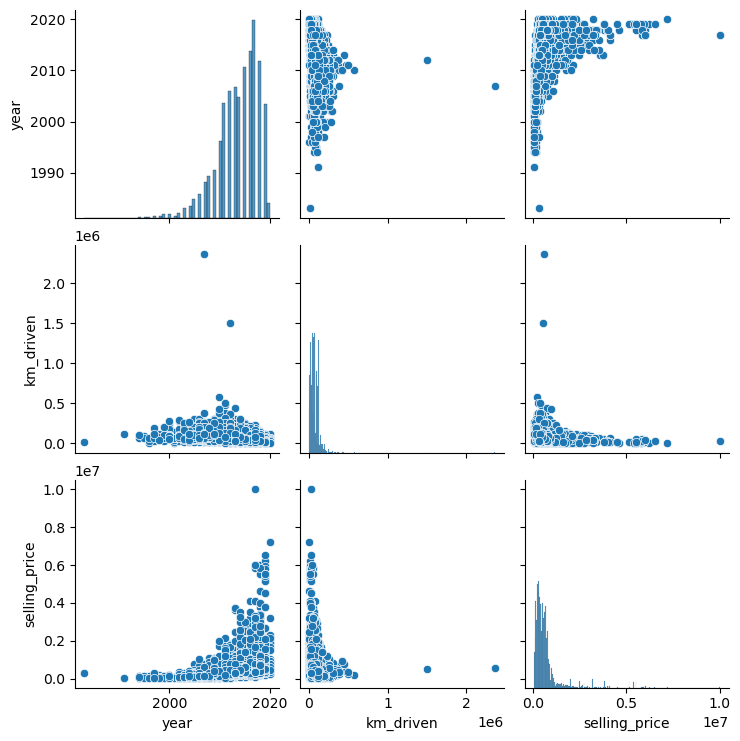

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Car details v3.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
# Visualizaciones
sns.histplot(df['selling_price'], kde=True)
plt.title("Distribución del Precio de Venta")
plt.show()

sns.boxplot(data=df, x='fuel', y='selling_price')
plt.title("Precio vs Tipo de Combustible")
plt.show()

sns.pairplot(df[['year', 'km_driven', 'selling_price']])

In [3]:
df = df.drop(['name'], axis=1)

df = pd.get_dummies(df, drop_first=True)

# Valores nulos
df = df.dropna()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['km_driven', 'selling_price']] = scaler.fit_transform(df[['km_driven', 'selling_price']])


In [5]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)

print(selector.scores_)


[1.61869353e+03 4.10545496e+02 1.35444330e+01 ... 2.12177888e-01
 1.42072152e+00 8.81436705e-01]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 7.036098631811904e+17
R²: -6.228836160889024e+17


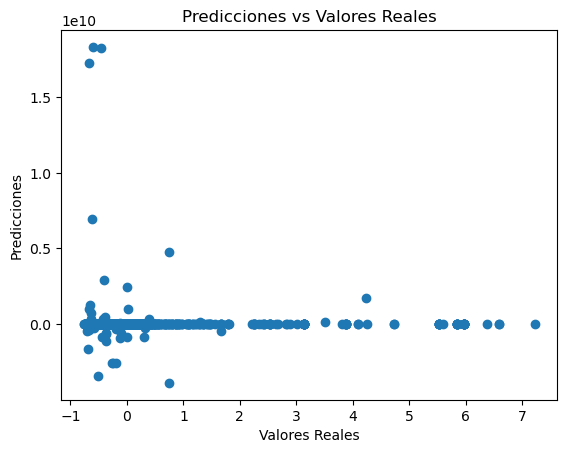

In [13]:
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.show()
